In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\C2_test.gender_submission.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [4]:
x = df.drop('Sex',axis=1)
y=df['Sex']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df1 = df[['PassengerId','Pclass','Age','SibSp', 'Parch','Fare','Sex']]
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,892,3,34.5,0,0,7.8292,male
1,893,3,47.0,1,0,7.0000,female
2,894,2,62.0,0,0,9.6875,male
3,895,3,27.0,0,0,8.6625,male
4,896,3,22.0,1,1,12.2875,female
...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,male
414,1306,1,39.0,0,0,108.9000,female
415,1307,3,38.5,0,0,7.2500,male
416,1308,3,NaN,0,0,8.0500,male


In [8]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex          418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [9]:
df2 = df1.fillna(0)

In [24]:
x = df2[['PassengerId','Pclass','Age','SibSp', 'Parch','Fare']]
y = df2['Sex']

In [25]:
g1 = {"Sex":{'Male':1,'Female':2}}
df2= df2.replace(g1)
print(df2)

     PassengerId  Pclass   Age  SibSp  Parch      Fare     Sex
0            892       3  34.5      0      0    7.8292    male
1            893       3  47.0      1      0    7.0000  female
2            894       2  62.0      0      0    9.6875    male
3            895       3  27.0      0      0    8.6625    male
4            896       3  22.0      1      1   12.2875  female
..           ...     ...   ...    ...    ...       ...     ...
413         1305       3   0.0      0      0    8.0500    male
414         1306       1  39.0      0      0  108.9000  female
415         1307       3  38.5      0      0    7.2500    male
416         1308       3   0.0      0      0    8.0500    male
417         1309       3   0.0      1      1   22.3583    male

[418 rows x 7 columns]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
y_train.shape

(292,)

In [30]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
parameters = {
    'max_depth':[13,24,53,64,25],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 24, 53, 64, 25],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [34]:
grid_search.best_score_

0.6712328767123288

In [35]:
from sklearn.tree import plot_tree

In [36]:
rfc_best= grid_search.best_estimator_

[Text(1888.6153846153845, 2989.7999999999997, 'Fare <= 7.604\ngini = 0.479\nsamples = 178\nvalue = [116, 176]\nclass = No'),
 Text(1545.230769230769, 2446.2, 'gini = 0.137\nsamples = 17\nvalue = [2, 25]\nclass = No'),
 Text(2232.0, 2446.2, 'PassengerId <= 1133.5\ngini = 0.49\nsamples = 161\nvalue = [114, 151]\nclass = No'),
 Text(1373.5384615384614, 1902.6, 'PassengerId <= 1088.0\ngini = 0.5\nsamples = 89\nvalue = [69, 69]\nclass = Yes'),
 Text(1030.1538461538462, 1358.9999999999998, 'Age <= 31.25\ngini = 0.489\nsamples = 71\nvalue = [46, 62]\nclass = No'),
 Text(686.7692307692307, 815.3999999999996, 'Age <= 21.5\ngini = 0.5\nsamples = 50\nvalue = [38, 40]\nclass = No'),
 Text(343.38461538461536, 271.7999999999997, 'gini = 0.45\nsamples = 27\nvalue = [14, 27]\nclass = No'),
 Text(1030.1538461538462, 271.7999999999997, 'gini = 0.456\nsamples = 23\nvalue = [24, 13]\nclass = Yes'),
 Text(1373.5384615384614, 815.3999999999996, 'gini = 0.391\nsamples = 21\nvalue = [8, 22]\nclass = No'),
 Te

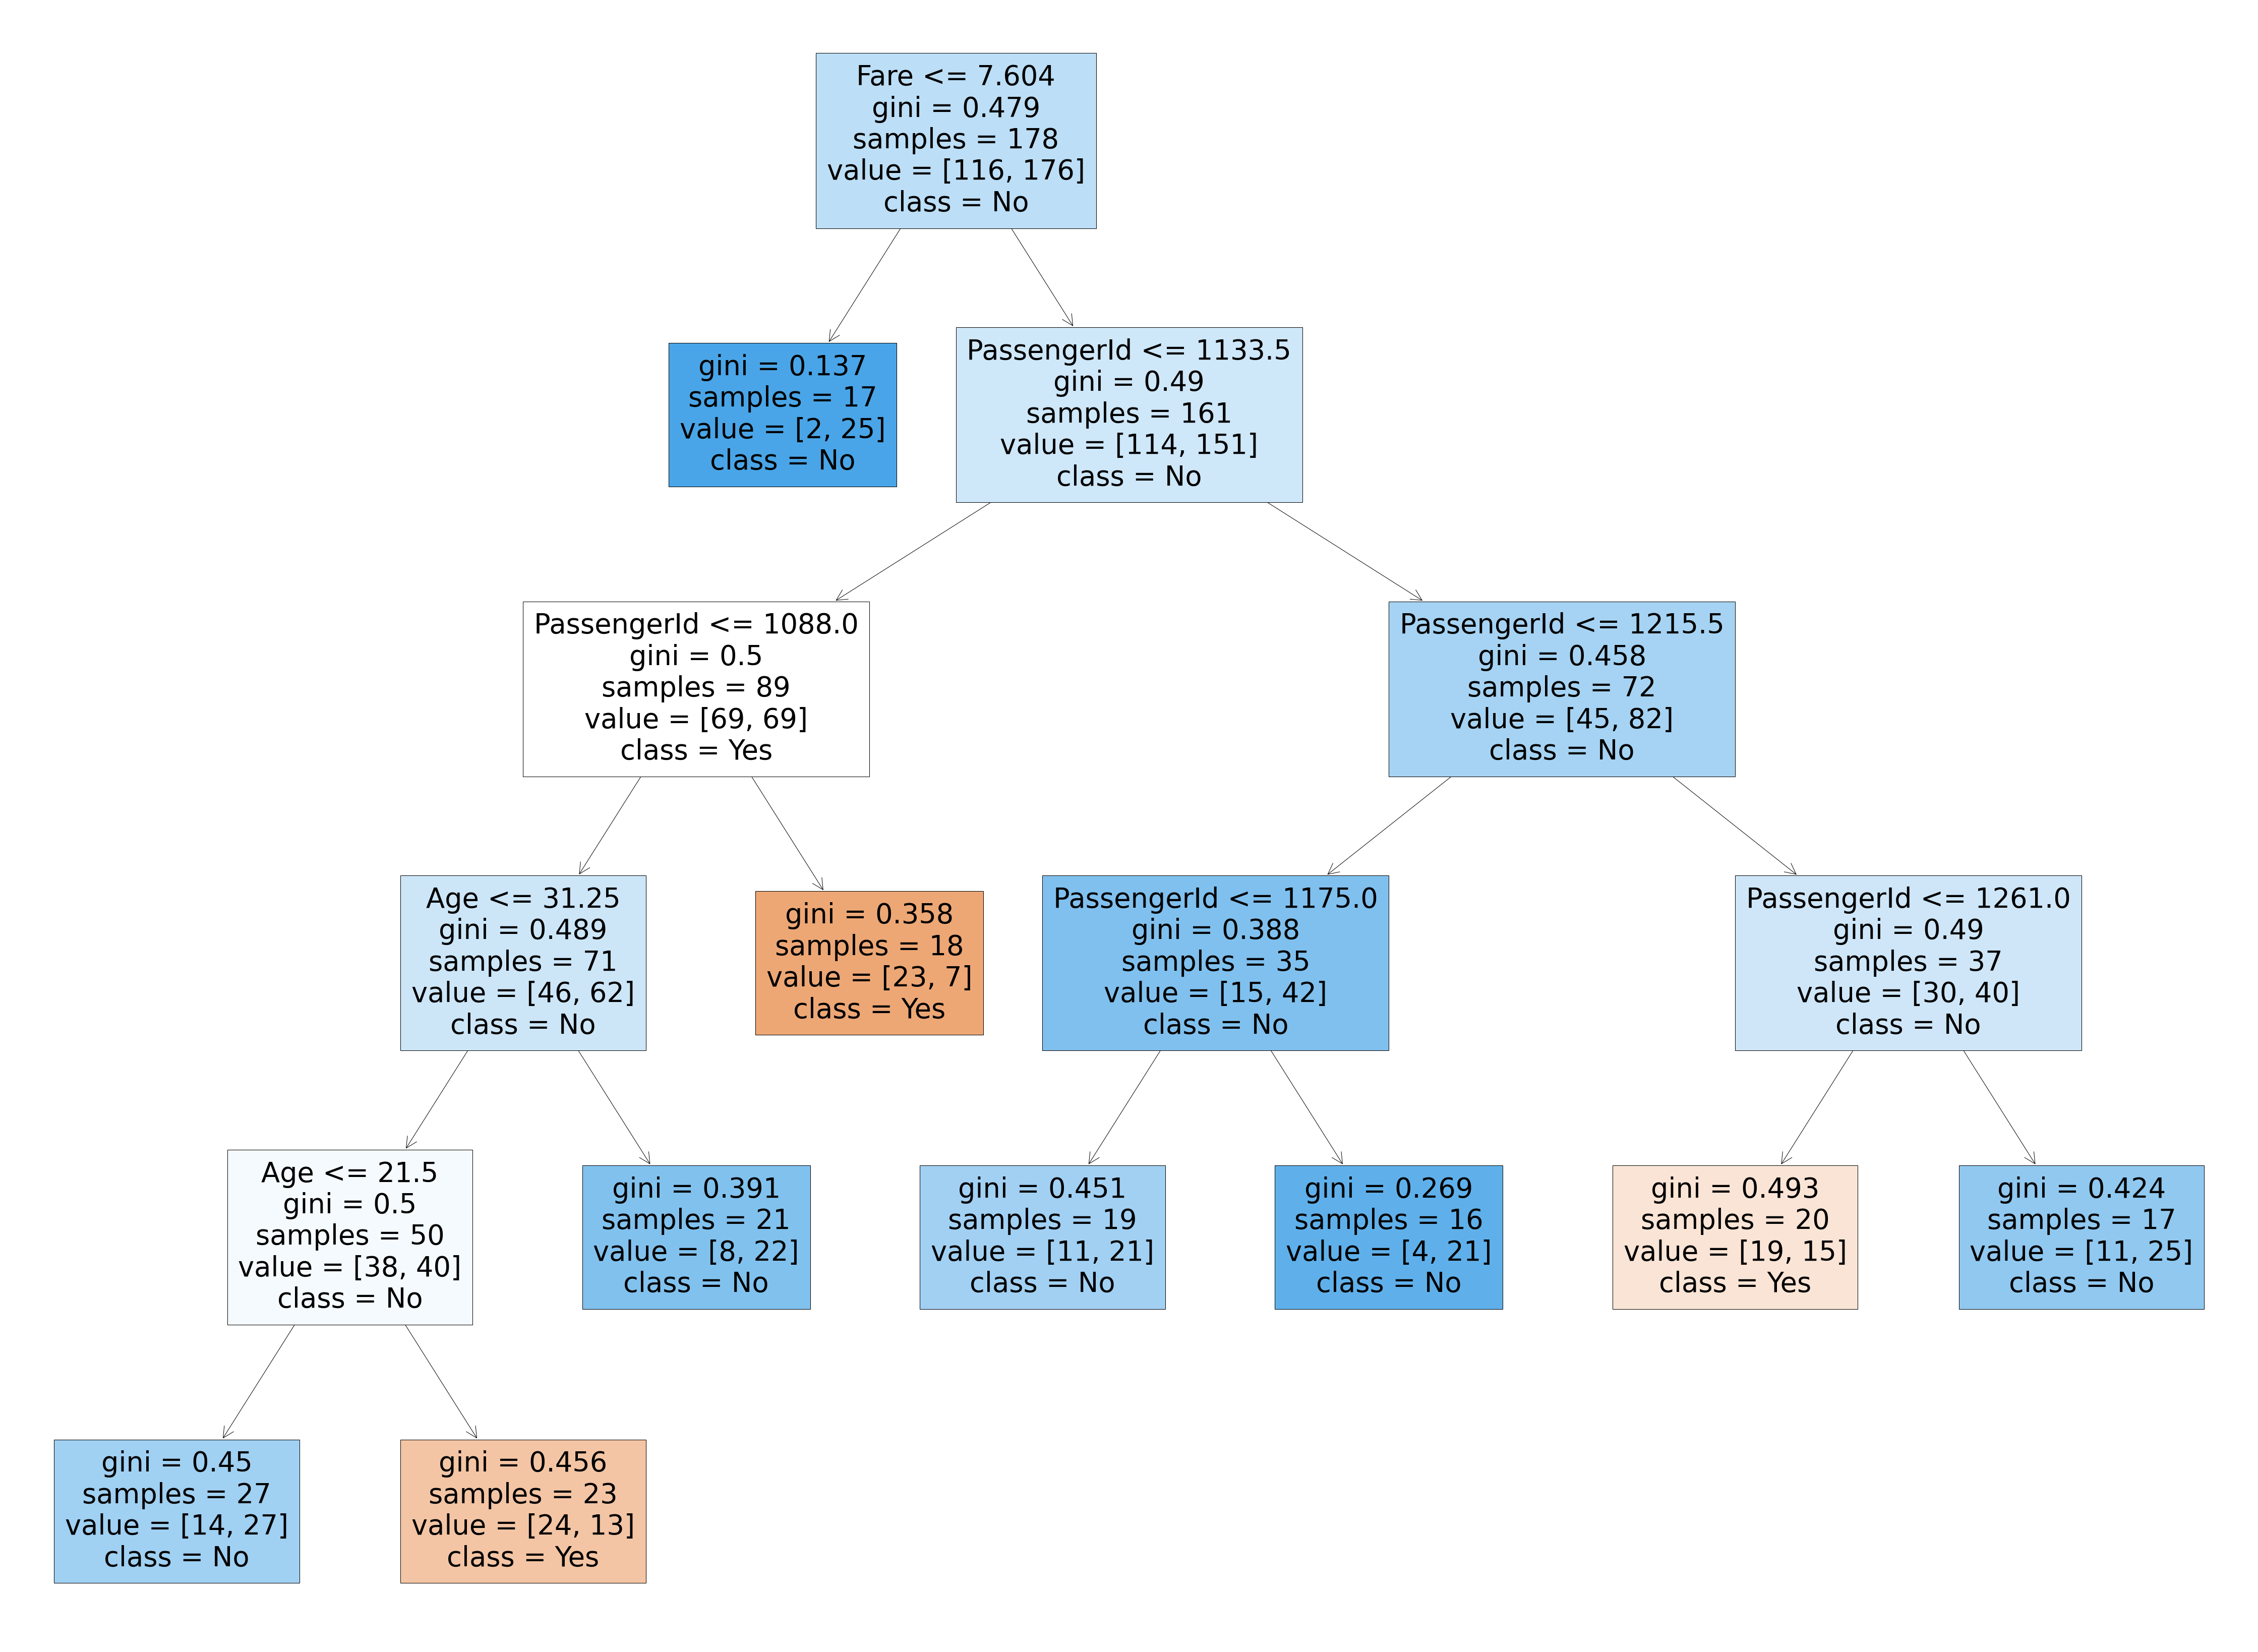

In [37]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)